In [1]:
from process_helper import *
import numpy as np

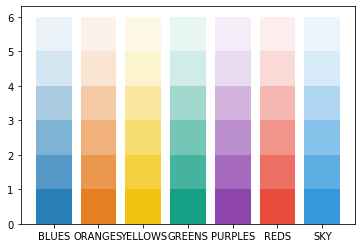

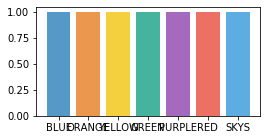

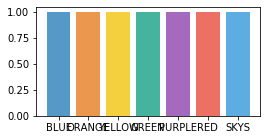

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
exp = "exp_ycsbe_10g_fanout250_analysis"

In [6]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [7]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'bufferd_idx_pgs_', 'cc_time_ms', 'commit_cnt_',
       'commit_latency_perc0_us', 'commit_latency_perc50_us',
       'commit_latency_perc99_us', 'commit_queue_sz_', 'g_buf_entry_sz',
       'g_buf_type', 'g_check_loaded', 'g_commit_group_sz', 'g_commit_pool_sz',
       'g_commit_queue_limit', 'g_cpu_freq', 'g_early_lock_release',
       'g_enable_group_commit', 'g_enable_logging',
       'g_enable_phantom_protection', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
 

In [8]:
# create pivot table
df0 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["read_perc_", 0]
])
pivot0_ids = df0.groupby(["g_total_buf_sz"])["throughput_txn_per_sec"].idxmax().values
pivot0 = df0.loc[pivot0_ids].groupby("g_total_buf_sz")[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_", "remote_rd_time_ms","remote_scan_time_ms",
    "accesses_"].median()
pivot0

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_,remote_rd_time_ms,remote_scan_time_ms,accesses_
g_total_buf_sz,,,,,,,,,,,,,,
3000000000,552.262,0,0.840204,519258,12.7674,10756.8,2958.12,11550.5,5198,539,66365,2075.29,957854,3249501
6000000000,1109.580,416,0.923103,502296,30.7211,13197.9,1983.76,13833.4,4339,496,133288,2494.97,955841,6532083
9000000000,3263.680,3115,0.975212,475526,679.1490,103403.0,2408.43,103997.0,577,505,391869,2022.49,503161,19183845
15000000000,3370.560,41440,1.000000,0,829.8220,122259.0,2370.42,123965.0,488,0,404953,0.00,0,19873451


In [9]:
pivot0["remote_rd_time_ms"] / pivot0["remote_rds_"]

g_total_buf_sz
3000000000     3.850260
6000000000     5.030181
9000000000     4.004931
15000000000         NaN
dtype: float64

In [10]:
df0.loc[:, ["g_total_buf_sz", "cc_time_ms", "idx_time_ms", 
            "commit_latency_perc0_us", "commit_latency_perc50_us", "commit_latency_perc99_us"]]

,g_total_buf_sz,cc_time_ms,idx_time_ms,commit_latency_perc0_us,commit_latency_perc50_us,commit_latency_perc99_us
0,15000000000,389.5080,2366.08,44967.60,219589.0,1008980.0
1,9000000000,316.6870,507116.00,14169.70,167260.0,1235060.0
2,6000000000,107.7270,959254.00,7472.69,22033.9,209434.0
3,3000000000,55.9639,960605.00,7495.01,18195.6,199054.0


In [11]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
    ["read_perc_", 0]
])
pivot2 = df2.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "idx_misses_", "idx_accesses_"
    ].max()
pivot2

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,g_buf_type,remote_rds_,commit_cnt_,remote_rd_time_ms,idx_misses_,idx_accesses_
g_total_buf_sz,,,,,,,,,,,,,,,
3000000000,643.901,0,0.955930,182603,15.1561,11683.4,5640.04,11721.3,5120,PGBUF,182603,77589,959812.00000,3714,340397
6000000000,980.028,13036,0.973024,177432,27.3241,13403.6,4069.24,13446.2,4461,PGBUF,177432,121893,955752.00000,7388,587193
9000000000,1706.430,24430,0.984602,174357,67.1564,19117.1,3091.71,19197.0,3126,PGBUF,174357,209870,961562.00000,9066,1018345
15000000000,3319.140,34887,1.000000,1,825.3640,123543.0,2408.18,124338.0,483,PGBUF,1,398651,5.85218,1,1887913


In [12]:
# create pivot table
df3 = apply_mask(df, [
    ["g_buf_type", ["eq", "NOBUF"]],
    ["read_perc_", 0]
])
pivot3 = df3.groupby([
    "g_total_buf_sz", 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", "commit_cnt_",
    "num_flushes_", "g_buf_type", "remote_rds_", "remote_rd_time_ms", "remote_scan_time_ms"
    ].max()
pivot3

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),commit_cnt_,num_flushes_,g_buf_type,remote_rds_,remote_rd_time_ms,remote_scan_time_ms
g_total_buf_sz,,,,,,,,,,,,,,
3000000000,86.9045,4,0.0,604326,1.66864,8397.35,12638.0,9584.97,10447,6262,NOBUF,546,2216.5,955021


[0.3, 0.6, 0.9, 1.3]


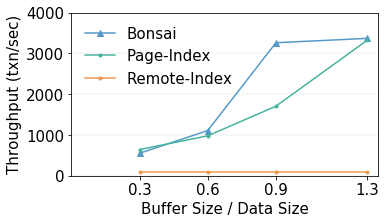

In [13]:
workload_ratio = [round(sz / 10240000000.0 * 10) / 10.0 for sz in pivot0.index]
workload_ratio[-1] = 1.3
print(workload_ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker="^", label="Bonsai")
ax.plot(workload_ratio, 
        pivot2["throughput_txn_per_sec"],
        color=line_colors["GREEN"],
        marker=".", label="Page-Index")
ax.plot(workload_ratio, 
        [pivot3["throughput_txn_per_sec"].values] * pivot0.shape[0],
        color=line_colors["ORANGE"],
        marker=".", label="Remote-Index")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
ax.set_ylim(0, 4000)
ax.set_xlim(xmin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
fig.set_size_inches(5.5, 3)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "ycsbe_10g_fanout250_limit16k.pdf", bbox_inches="tight") 

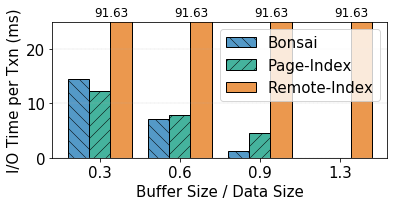

In [14]:
fig, ax = plt.subplots(1, 1)
xvals = np.arange(len(workload_ratio))
width = (1 - 0.2) / 3
ax.bar(xvals, (pivot0["remote_rd_time_ms"] + pivot0["remote_scan_time_ms"]) / pivot0["commit_cnt_"],
       width=width, edgecolor="black", hatch="\\\\",
       facecolor=bar_colors["BLUE"], label="Bonsai")
ax.bar(xvals + width, pivot2["remote_rd_time_ms"] / pivot2["commit_cnt_"],
      width=width, edgecolor="black", hatch="//",
       facecolor=bar_colors["GREEN"], label="Page-Index")
val3 = (pivot3["remote_rd_time_ms"] + pivot3["remote_scan_time_ms"]) / pivot3["commit_cnt_"]
ax.bar(xvals + width*2, val3,
      width=width, edgecolor="black", 
       facecolor=bar_colors["ORANGE"], label="Remote-Index")
for x in xvals:
    ax.text(x + 0.2, 26, "%.2f" % val3, color="black", size=12)
ax.set_ylim(0, 25)
plt.xticks(xvals + width, workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("I/O Time per Txn (ms)")
fig.set_size_inches(6, 2.5)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
plt.legend()
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "ycsbe_10g_fanout250_limit16k_analysis.pdf", bbox_inches="tight") 